In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-01-17 03:49:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   207MB/s    in 0.5s    

2022-01-17 03:49:03 (207 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/test/pizza

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

In [5]:
import os

for dirpath ,dirnames,filenames  in  os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'


In [6]:
#Another method
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [7]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+"/"+ target_class
  print(target_folder)
  random_img = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img


pizza_steak/train/pizza
Image shape: (288, 512, 3)


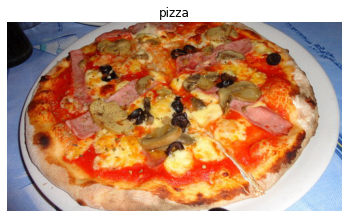

In [9]:
img = view_random_image("pizza_steak/train", target_class="pizza")


In [10]:
img

array([[[  4,   2,   3],
        [  6,   4,   5],
        [  8,   6,   7],
        ...,
        [ 67,  83, 119],
        [ 67,  83, 119],
        [ 68,  84, 120]],

       [[  4,   2,   3],
        [  6,   4,   5],
        [  8,   6,   7],
        ...,
        [ 70,  86, 122],
        [ 69,  85, 121],
        [ 70,  86, 122]],

       [[  3,   1,   2],
        [  5,   3,   4],
        [  7,   5,   6],
        ...,
        [ 73,  89, 125],
        [ 72,  88, 124],
        [ 71,  87, 123]],

       ...,

       [[ 69,  72, 103],
        [ 71,  74, 105],
        [ 74,  79, 109],
        ...,
        [184, 222, 255],
        [159, 197, 236],
        [178, 216, 255]],

       [[ 76,  81, 111],
        [ 71,  76, 106],
        [ 66,  71, 101],
        ...,
        [171, 206, 244],
        [177, 212, 250],
        [179, 214, 252]],

       [[ 61,  66,  95],
        [ 70,  75, 105],
        [ 78,  83, 113],
        ...,
        [162, 196, 233],
        [183, 217, 254],
        [174, 208, 245]]

In [11]:
img/255.

array([[[0.01568627, 0.00784314, 0.01176471],
        [0.02352941, 0.01568627, 0.01960784],
        [0.03137255, 0.02352941, 0.02745098],
        ...,
        [0.2627451 , 0.3254902 , 0.46666667],
        [0.2627451 , 0.3254902 , 0.46666667],
        [0.26666667, 0.32941176, 0.47058824]],

       [[0.01568627, 0.00784314, 0.01176471],
        [0.02352941, 0.01568627, 0.01960784],
        [0.03137255, 0.02352941, 0.02745098],
        ...,
        [0.2745098 , 0.3372549 , 0.47843137],
        [0.27058824, 0.33333333, 0.4745098 ],
        [0.2745098 , 0.3372549 , 0.47843137]],

       [[0.01176471, 0.00392157, 0.00784314],
        [0.01960784, 0.01176471, 0.01568627],
        [0.02745098, 0.01960784, 0.02352941],
        ...,
        [0.28627451, 0.34901961, 0.49019608],
        [0.28235294, 0.34509804, 0.48627451],
        [0.27843137, 0.34117647, 0.48235294]],

       ...,

       [[0.27058824, 0.28235294, 0.40392157],
        [0.27843137, 0.29019608, 0.41176471],
        [0.29019608, 0

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation="relu",
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
model_1.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
history_1 = model_1.fit(train_data,epochs =5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 26s 205ms/step - loss: 0.5646 - accuracy: 0.7100 - val_loss: 0.3590 - val_accuracy: 0.8460
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4171 - accuracy: 0.8107 - val_loss: 0.3391 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3971 - accuracy: 0.8160 - val_loss: 0.3734 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3508 - accuracy: 0.8533 - val_loss: 0.3157 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.2974 - accuracy: 0.8793 - val_loss: 0.2919 - val_accuracy: 0.8620


In [14]:
"""
history_2 = model_1.fit(train_data,epochs =20,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))
                        """

'\nhistory_2 = model_1.fit(train_data,epochs =20,\n                        steps_per_epoch = len(train_data),\n                        validation_data = valid_data,\n                        validation_steps = len(valid_data))\n                        '

In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [16]:
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 183ms/step - loss: 1.8911 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [18]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
          tf.keras.layers.Dense(100,activation='relu'),
          tf.keras.layers.Dense(100,activation="relu"),
          tf.keras.layers.Dense(100,activation="relu"),
          tf.keras.layers.Dense(1,activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 181ms/step - loss: 5.1139 - accuracy: 0.5993 - val_loss: 1.6383 - val_accuracy: 0.6660
Epoch 2/5
47/47 [==============================] - 8s 175ms/step - loss: 0.7104 - accuracy: 0.7147 - val_loss: 0.5798 - val_accuracy: 0.7120
Epoch 3/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6714 - accuracy: 0.7260 - val_loss: 0.5655 - val_accuracy: 0.7440
Epoch 4/5
47/47 [==============================] - 8s 175ms/step - loss: 0.7735 - accuracy: 0.7053 - val_loss: 1.1397 - val_accuracy: 0.5740
Epoch 5/5
47/47 [==============================] - 8s 175ms/step - loss: 0.5261 - accuracy: 0.7787 - val_loss: 0.4300 - val_accuracy: 0.7880


In [19]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


pizza_steak/train//steak
Image shape: (289, 512, 3)
pizza_steak/train//pizza
Image shape: (512, 512, 3)


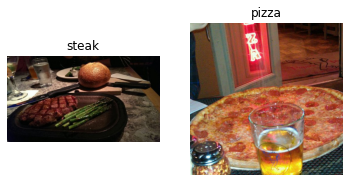

In [20]:
  plt.figure()
  plt.subplot(1,2,1)
  steak_img = view_random_image("pizza_steak/train/", "steak")
  plt.subplot(1,2,2)
  pizza_img = view_random_image("pizza_steak/train/","pizza")

In [21]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"


In [22]:
!nvidia-smi

Mon Jan 17 03:51:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    27W /  70W |   2328MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [23]:
 from tensorflow.keras.preprocessing.image import ImageDataGenerator
 train_datagen = ImageDataGenerator(rescale = 1/255.)
 test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             class_mode = "binary",
                                             batch_size = 32)

                                      

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
images, labels = train_data.next()

In [26]:
len(images), len(labels)

(32, 32)

In [27]:
len(train_data), 1500/32

(47, 46.875)

In [28]:
images[0], images[0].shape

(array([[[0.47058827, 0.40784317, 0.34509805],
         [0.4784314 , 0.427451  , 0.3647059 ],
         [0.48627454, 0.43529415, 0.37254903],
         ...,
         [0.8313726 , 0.70980394, 0.48627454],
         [0.8431373 , 0.73333335, 0.5372549 ],
         [0.87843144, 0.7725491 , 0.5882353 ]],
 
        [[0.50980395, 0.427451  , 0.36078432],
         [0.5058824 , 0.42352945, 0.35686275],
         [0.5137255 , 0.4431373 , 0.3647059 ],
         ...,
         [0.82745105, 0.7058824 , 0.48235297],
         [0.82745105, 0.70980394, 0.5058824 ],
         [0.8431373 , 0.73333335, 0.5372549 ]],
 
        [[0.5254902 , 0.427451  , 0.34901962],
         [0.5372549 , 0.43921572, 0.36078432],
         [0.5372549 , 0.45098042, 0.36078432],
         ...,
         [0.82745105, 0.7019608 , 0.4784314 ],
         [0.82745105, 0.7058824 , 0.49411768],
         [0.8352942 , 0.7176471 , 0.5137255 ]],
 
        ...,
 
        [[0.77647066, 0.5647059 , 0.2901961 ],
         [0.7803922 , 0.53333336, 0.22352

In [29]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [30]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [31]:
model_4 = Sequential([
       Conv2D(filters=10,
              kernel_size=3,
              strides=1,
              padding="valid",
              activation = "relu",
              input_shape=(224,224,3)),
              Conv2D(10,3,activation="relu"),
              Conv2D(10,3,activation="relu"),
              Flatten(),
              Dense(1, activation="sigmoid")
])

In [32]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [33]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 197ms/step - loss: 1.6101 - accuracy: 0.6627 - val_loss: 0.4058 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4237 - accuracy: 0.8133 - val_loss: 0.4111 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3475 - accuracy: 0.8593 - val_loss: 0.3608 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.2671 - accuracy: 0.8987 - val_loss: 0.3820 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.1633 - accuracy: 0.9487 - val_loss: 0.4631 - val_accuracy: 0.8000


In [34]:
model_1.evaluate(test_data)
model_2.evaluate(test_data)
model_3.evaluate(test_data)
model_4.evaluate(test_data)

16/16 [==============================] - 2s 131ms/step - loss: 0.4631 - accuracy: 0.8000


[0.46313080191612244, 0.800000011920929]

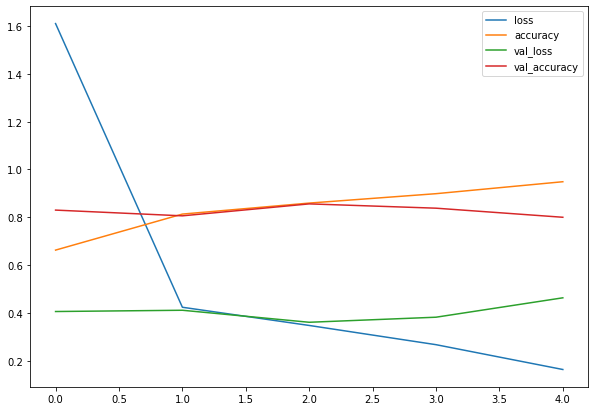

In [35]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [36]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  accuracy = history.history["accuracy"]
  val_loss = history.history["val_loss"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend();

  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

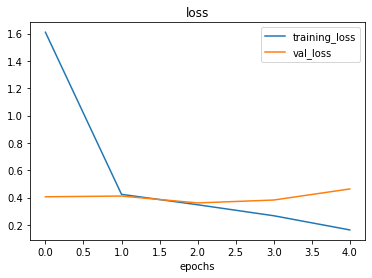

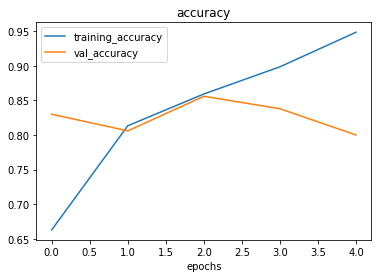

In [37]:
plot_loss_curves(history_4)

In [38]:
model_5 = Sequential([
        Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
        MaxPool2D(pool_size=2),
        Conv2D(10,3,activation="relu"),
        MaxPool2D(),
        Conv2D(10,3,activation="relu"),
        MaxPool2D(),
        Flatten(),
        Dense(1, activation="sigmoid")
])

In [39]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

In [40]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 190ms/step - loss: 0.6016 - accuracy: 0.6847 - val_loss: 0.4542 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4550 - accuracy: 0.7993 - val_loss: 0.3878 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4196 - accuracy: 0.8093 - val_loss: 0.3543 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3969 - accuracy: 0.8340 - val_loss: 0.3481 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3565 - accuracy: 0.8527 - val_loss: 0.3383 - val_accuracy: 0.8520


In [41]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

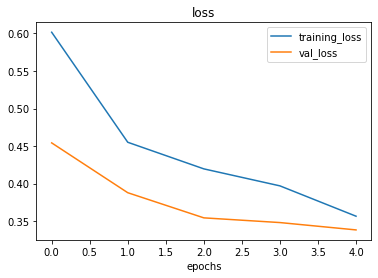

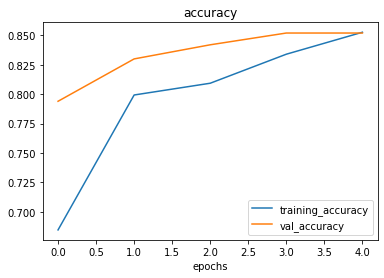

In [42]:
plot_loss_curves(history_5)

In [43]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [44]:
!nvidia-smi

Mon Jan 17 03:53:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    28W /  70W |   2328MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [45]:
print("Augumented training images:")
train_datagen_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode="binary",
                                                                      shuffle=False)
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)
print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augumented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [46]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_datagen_augmented.next()

In [47]:
len(images),len(labels)

(32, 32)

In [48]:
len(augmented_images), len(augmented_labels)

(32, 32)

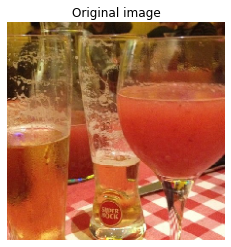

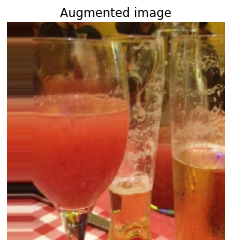

In [49]:
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [50]:
!nvidia-smi

Mon Jan 17 03:53:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    28W /  70W |   2328MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [51]:
!nvidia-smi

Mon Jan 17 03:53:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    28W /  70W |   2328MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [52]:
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])


model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


history_6 = model_6.fit(train_datagen_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_datagen_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 465ms/step - loss: 0.7068 - accuracy: 0.4100 - val_loss: 0.6849 - val_accuracy: 0.6640
Epoch 2/5
47/47 [==============================] - 22s 459ms/step - loss: 0.6914 - accuracy: 0.5033 - val_loss: 0.6687 - val_accuracy: 0.5660
Epoch 3/5
47/47 [==============================] - 22s 458ms/step - loss: 0.6814 - accuracy: 0.5973 - val_loss: 0.6325 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 21s 458ms/step - loss: 0.6659 - accuracy: 0.6220 - val_loss: 0.5766 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 22s 463ms/step - loss: 0.6671 - accuracy: 0.6753 - val_loss: 0.6137 - val_accuracy: 0.6900


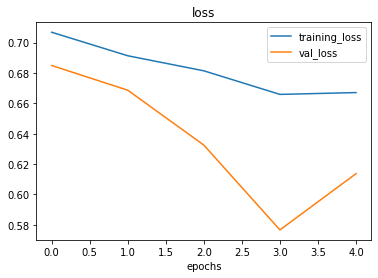

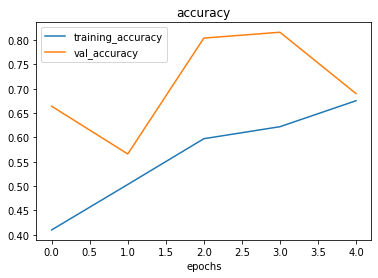

In [53]:
plot_loss_curves(history_6)

In [54]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True)

Found 1500 images belonging to 2 classes.


In [55]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 462ms/step - loss: 0.6377 - accuracy: 0.6307 - val_loss: 0.5099 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 22s 459ms/step - loss: 0.5123 - accuracy: 0.7520 - val_loss: 0.4893 - val_accuracy: 0.7360
Epoch 3/5
47/47 [==============================] - 22s 459ms/step - loss: 0.4653 - accuracy: 0.7820 - val_loss: 0.3289 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 22s 463ms/step - loss: 0.4650 - accuracy: 0.7833 - val_loss: 0.3297 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 21s 457ms/step - loss: 0.4514 - accuracy: 0.7867 - val_loss: 0.3170 - val_accuracy: 0.8740


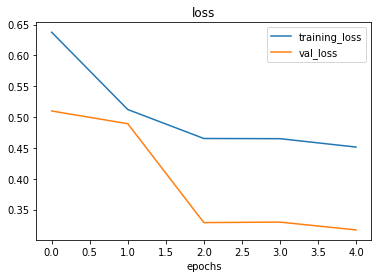

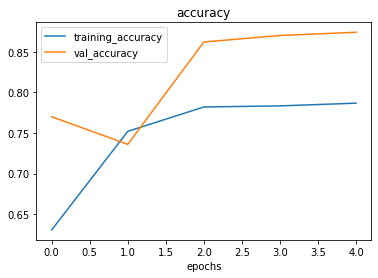

In [56]:
plot_loss_curves(history_7)

In [57]:
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 478ms/step - loss: 0.6427 - accuracy: 0.6300 - val_loss: 0.4619 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 22s 471ms/step - loss: 0.5391 - accuracy: 0.7467 - val_loss: 0.4133 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 22s 471ms/step - loss: 0.5264 - accuracy: 0.7407 - val_loss: 0.4699 - val_accuracy: 0.7700
Epoch 4/5
47/47 [==============================] - 22s 469ms/step - loss: 0.4897 - accuracy: 0.7747 - val_loss: 0.3677 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 22s 468ms/step - loss: 0.4604 - accuracy: 0.7973 - val_loss: 0.3784 - val_accuracy: 0.8700


In [58]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [59]:
print(class_names)

['pizza' 'steak']


--2022-01-17 04:00:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2022-01-17 04:00:21 (51.7 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



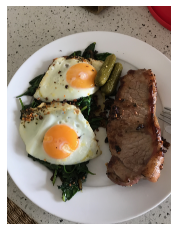

In [60]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [61]:
steak.shape

(4032, 3024, 3)

In [62]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [63]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [64]:
model_8.predict(steak)

ValueError: ignored

In [65]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [66]:
pred = model_8.predict(steak)
pred

array([[0.7962261]], dtype=float32)

In [68]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [69]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Making a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Getting the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plotting the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

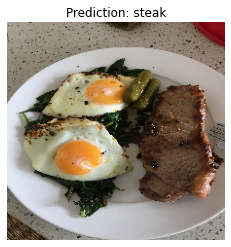

In [70]:
pred_and_plot(model_8, "03-steak.jpeg", class_names)

In [71]:
!wget https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.simplyrecipes.com%2Fthmb%2F8caxM88NgxZjz-T2aeRW3xjhzBg%3D%2F2000x1125%2Fsmart%2Ffilters%3Ano_upscale()%2F__opt__aboutcom__coeus__resources__content_migration__simply_recipes__uploads__2019__09__easy-pepperoni-pizza-lead-3-8f256746d649404baa36a44d271329bc.jpg&imgrefurl=https%3A%2F%2Fwww.simplyrecipes.com%2Frecipes%2Fhomemade_pepperoni_pizza%2F&tbnid=Hh3NCWGCALGzJM&vet=12ahUKEwjPvY7987f1AhXR_jgGHTX6BBcQMygBegUIARDxAQ..i&docid=Ck5z3mFwtc-sLM&w=2000&h=1125&itg=1&q=pizza&client=opera&ved=2ahUKEwjPvY7987f1AhXR_jgGHTX6BBcQMygBegUIARDxAQ

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `wget https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.simplyrecipes.com%2Fthmb%2F8caxM88NgxZjz-T2aeRW3xjhzBg%3D%2F2000x1125%2Fsmart%2Ffilters%3Ano_upscale()%2F__opt__aboutcom__coeus__resources__content_migration__simply_recipes__uploads__2019__09__easy-pepperoni-pizza-lead-3-8f256746d649404baa36a44d271329bc.jpg&imgrefurl=https%3A%2F%2Fwww.simplyrecipes.com%2Frecipes%2Fhomemade_pepperoni_pizza%2F&tbnid=Hh3NCWGCALGzJM&vet=12ahUKEwjPvY7987f1AhXR_jgGHTX6BBcQMygBegUIARDxAQ..i&docid=Ck5z3mFwtc-sLM&w=2000&h=1125&itg=1&q=pizza&client=opera&ved=2ahUKEwjPvY7987f1AhXR_jgGHTX6BBcQMygBegUIARDxAQ'


In [72]:
!wget https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.simplyrecipes.com%2Fthmb%2F8caxM88NgxZjz-T2aeRW3xjhzBg%3D%2F2000x1125%2Fsmart%2Ffilters%3Ano_upscale()%2F__opt__aboutcom__coeus__resources__content_migration__simply_recipes__uploads__2019__09__easy-pepperoni-pizza-lead-3-8f256746d649404baa36a44d271329bc.jpg&imgrefurl=https%3A%2F%2Fwww.simplyrecipes.com%2Frecipes%2Fhomemade_pepperoni_pizza%2F&tbnid=Hh3NCWGCALGzJM&vet=12ahUKEwjPvY7987f1AhXR_jgGHTX6BBcQMygBegUIARDxAQ..i&docid=Ck5z3mFwtc-sLM&w=2000&h=1125&itg=1&q=pizza&client=opera&ved=2ahUKEwjPvY7987f1AhXR_jgGHTX6BBcQMygBegUIARDxAQ

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `wget https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.simplyrecipes.com%2Fthmb%2F8caxM88NgxZjz-T2aeRW3xjhzBg%3D%2F2000x1125%2Fsmart%2Ffilters%3Ano_upscale()%2F__opt__aboutcom__coeus__resources__content_migration__simply_recipes__uploads__2019__09__easy-pepperoni-pizza-lead-3-8f256746d649404baa36a44d271329bc.jpg&imgrefurl=https%3A%2F%2Fwww.simplyrecipes.com%2Frecipes%2Fhomemade_pepperoni_pizza%2F&tbnid=Hh3NCWGCALGzJM&vet=12ahUKEwjPvY7987f1AhXR_jgGHTX6BBcQMygBegUIARDxAQ..i&docid=Ck5z3mFwtc-sLM&w=2000&h=1125&itg=1&q=pizza&client=opera&ved=2ahUKEwjPvY7987f1AhXR_jgGHTX6BBcQMygBegUIARDxAQ'


In [73]:
!wget https://www.google.com/imgres?imgurl=https%3A%2F%2Fimg.onmanorama.com%2Fcontent%2Fdam%2Fmm%2Fen%2Ffood%2Ffeatures%2Fimages%2F2021%2F10%2F17%2Fpizza.jpg&imgrefurl=https%3A%2F%2Fwww.onmanorama.com%2Ffood%2Ffeatures%2F2021%2F10%2F17%2Fpizza-types-vegan-gluten-free.html&tbnid=LPcJ8mjivsDyJM&vet=12ahUKEwjPvY7987f1AhXR_jgGHTX6BBcQMygGegUIARD_AQ..i&docid=6vbUAQyFGx4obM&w=1248&h=650&itg=1&q=pizza&client=opera&ved=2ahUKEwjPvY7987f1AhXR_jgGHTX6BBcQMygGegUIARD_AQ

--2022-01-17 04:05:43--  https://www.google.com/imgres?imgurl=https%3A%2F%2Fimg.onmanorama.com%2Fcontent%2Fdam%2Fmm%2Fen%2Ffood%2Ffeatures%2Fimages%2F2021%2F10%2F17%2Fpizza.jpg
Resolving www.google.com (www.google.com)... 142.250.99.104, 142.250.99.103, 142.250.99.106, ...
Connecting to www.google.com (www.google.com)|142.250.99.104|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.google.com/imghp [following]
--2022-01-17 04:05:43--  https://www.google.com/imghp
Reusing existing connection to www.google.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘imgres?imgurl=https:%2F%2Fimg.onmanorama.com%2Fcontent%2Fdam%2Fmm%2Fen%2Ffood%2Ffeatures%2Fimages%2F2021%2F10%2F17%2Fpizza.jpg’

imgres?imgurl=https     [ <=>                ]  13.57K  --.-KB/s    in 0s      

2022-01-17 04:05:43 (82.2 MB/s) - ‘imgres?imgurl=https:%2F%2Fimg.onmanorama.com%2Fcontent%2Fdam%2Fmm%2Fen%2Ffood%2Ffeatures%2Fi

In [74]:
pred_and_plot(model_8, "imgres?imgurl=https:%2F%2Fimg.onmanorama.com%2Fcontent%2Fdam%2Fmm%2Fen%2Ffood%2Ffeatures%2Fimages%2F2021%2F10%2F17%2Fpizza.jpg", class_names)

InvalidArgumentError: ignored

--2022-01-17 04:07:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2022-01-17 04:07:59 (67.8 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



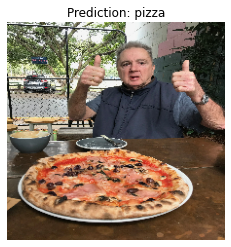

In [75]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)